In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df2 = df[["survived","pclass","age","parch"]]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
df3 = df2.fillna(df2.mean())

In [5]:
df3.isnull().any()

survived    False
pclass      False
age         False
parch       False
dtype: bool

In [6]:
featurs = df3.drop("survived",axis="columns")
label = df3["survived"]

In [7]:
print("Shape of featurs: ",featurs.shape)
print("Shape of label: ",label.shape)

Shape of featurs:  (891, 3)
Shape of label:  (891,)


In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(featurs,label,test_size=0.2,random_state = 51)

### Now doing scaling using stander scaler

In [9]:
sc = StandardScaler()

In [10]:
sc.fit(xtrain)

StandardScaler()

In [11]:
sc.mean_  # this is mean

array([ 2.30617978, 29.55409121,  0.39185393])

In [12]:
sc.scale_ # this is std

array([ 0.84405789, 12.99162985,  0.79647463])

In [13]:
xtrain.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [14]:
xtrain_sc = sc.transform(xtrain)
xtest_sc = sc.transform(xtest)

In [15]:
xtrain_sc = pd.DataFrame(xtrain_sc,columns=["pclass","age","parch"])
xtest_sc = pd.DataFrame(xtest_sc,columns= ["pclass","age","parch"])

In [16]:
xtrain_sc

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080
...,...,...,...
707,0.822005,0.727077,-0.491985
708,0.822005,0.011163,0.763547
709,0.822005,1.419830,3.274613
710,0.822005,0.011163,0.763547


In [17]:
xtrain_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [18]:
mmc = MinMaxScaler()

In [19]:
xtrain_mmc = mmc.fit_transform(xtrain)
xtest_mmc = mmc.transform(xtest)

In [20]:
xtrain_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [21]:
xtrain_mmc = pd.DataFrame(xtrain_mmc,columns=["pclass","age","parch"])
xtest_mmc = pd.DataFrame(xtest_mmc,columns= ["pclass","age","parch"])

In [22]:
xtrain_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


## PairPlot for before xtrain

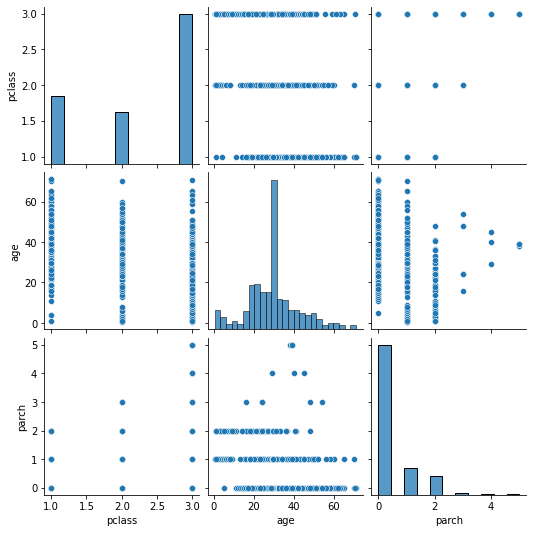

In [23]:
sns.pairplot(xtrain)
plt.show()

## After stander scaling 

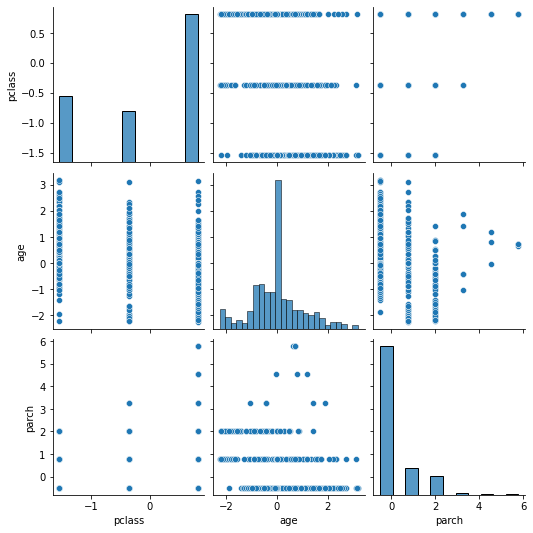

In [24]:
sns.pairplot(xtrain_sc)
plt.show()

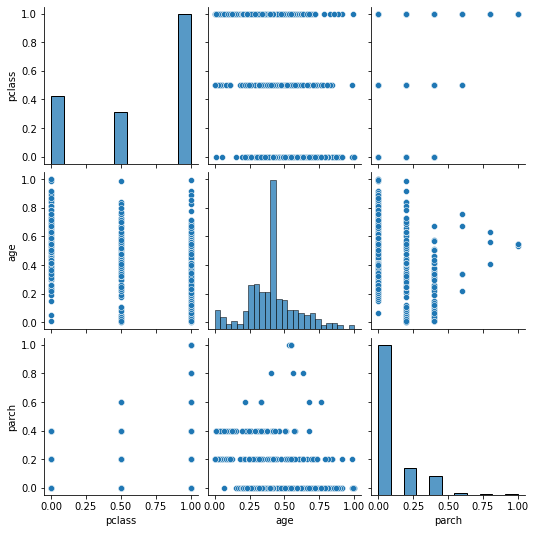

In [25]:
sns.pairplot(xtrain_mmc)
plt.show()